In [2]:
#! pip install lifelines

    100% |████████████████████████████████| 266kB 4.2MB/s ta 0:00:01
    100% |████████████████████████████████| 27.4MB 418kB/s eta 0:00:01
    100% |████████████████████████████████| 829kB 14.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for autograd ... - \ | / - \ | done
  Stored in directory: /Users/riow/Library/Caches/pip/wheels/72/6f/c2/40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
  Running setup.py bdist_wheel for future ... - \ | / - \ | / - \ | / - done
  Stored in directory: /Users/riow/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built autograd future
  Found existing installation: scipy 0.18.1
    Uninstalling scipy-0.18.1:
      Successfully uninstalled scipy-0.18.1
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
""" reference: http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html """

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [4]:
draft_df = pd.read_csv("data/nfl_survival_analysis_data.csv")

# set some plotting aesthetics, similar to ggplot
sns.set(palette = "colorblind", font_scale = 1.35,
        rc = {"figure.figsize": (12,9), "axes.facecolor": ".92"})

In [5]:
draft_df.head()

,Draft_Yr,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,...,Rec,Rec_Yds,Rec_TD,Tkl,Def_Int,Sk,College,Player_ID,Retired,Duration
0,1967,1,1,BAL,Bubba Smith,DE,22,1976,1,2,...,0,0,0,0.0,0,0.0,Michigan St.,SmitBu00,1,10
1,1967,1,2,MIN,Clint Jones,RB,22,1973,0,0,...,38,431,0,0.0,0,0.0,Michigan St.,JoneCl00,1,7
2,1967,1,3,SFO,Steve Spurrier,QB,22,1976,0,0,...,0,0,0,0.0,0,0.0,Florida,SpurSt00,1,10
3,1967,1,4,MIA,Bob Griese,QB,22,1980,2,8,...,0,0,0,0.0,0,0.0,Purdue,GrieBo00,1,14
4,1967,1,5,HOU,George Webster,LB,21,1976,3,3,...,0,0,0,0.0,5,0.0,Michigan St.,WebsGe00,1,10


In [6]:
kmf = KaplanMeierFitter()

In [33]:
#draft_df_test = draft_df[draft_df.Pos == "DT"]

In [37]:
# The 1st arg accepts an array or pd.Series of individual survival times
# The 2nd arg accepts an array or pd.Series that indicates if the event interest (or death) occured.
kmf.fit(durations = draft_df.Duration, event_observed = draft_df.Retired)

<lifelines.KaplanMeierFitter: fitted with 15592 observations, 1629 censored>

In [38]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,4597,4504,93,15592,15592
1,1310,1076,234,0,10995
2,1415,1176,239,0,9685
3,1183,952,231,0,8270
4,1126,942,184,0,7087
5,967,822,145,0,5961
6,915,782,133,0,4994
7,823,715,108,0,4079
8,743,667,76,0,3256


In [39]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

0.7111339148281169

In [40]:
# get the values for time = 1 from the survival table
event_at_1 = kmf.event_table.iloc[1, :]
# now calculate the survival probability for t = 1
surv_for_1 = (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.902137335152342

In [41]:
# get the values for time = 2 from the survival table
event_at_2 = kmf.event_table.iloc[2, :]
# now calculate the survival probability for t = 2
surv_for_2 = (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.8785751161590087

In [42]:
# The probability that an NFL player has a career longer than 2 years
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.5636414796488797

In [43]:
kmf.predict(2)

0.5636414796488793

In [44]:
# The survival probabilities of NFL player after 1, 3, 5, and 10 yrs played
kmf.predict([1, 3, 5, 10])

1     0.641540
3     0.498758
5     0.372828
10    0.112089
Name: KM_estimate, dtype: float64

In [45]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.711134
1.0,0.641540
2.0,0.563641
3.0,0.498758
4.0,0.432463
5.0,0.372828
6.0,0.314448
7.0,0.259329
8.0,0.206205


In [46]:
kmf.median_

3.0

# Plotting the Kaplan-Meier Estimate

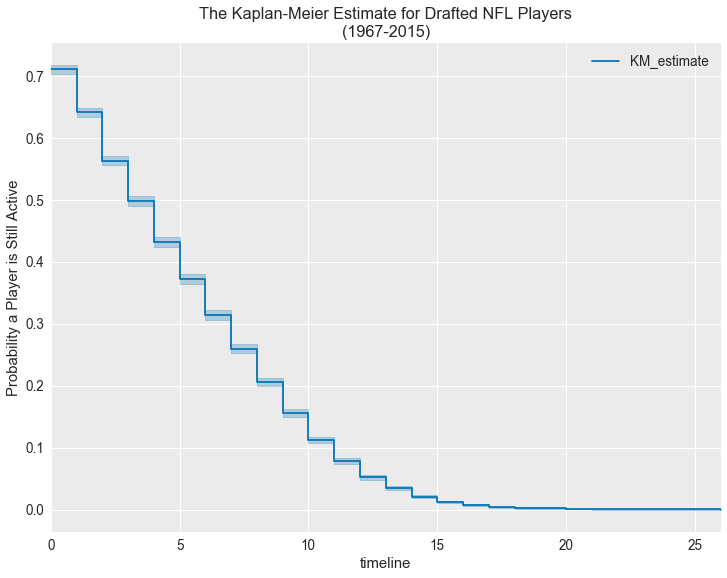

In [47]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Drafted NFL Players\n(1967-2015)")
plt.ylabel("Probability a Player is Still Active")
plt.show()

# Plotting the Kaplan-Meier Estimate by Position

In [18]:
draft_df.Pos.unique() # check out all the different positions

array(['DE', 'RB', 'QB', 'LB', 'WR', 'C', 'T', 'DT', 'G', 'HB', 'DB',
       'TE', 'K', 'FL', 'E', 'P', 'FB', 'WB', 'NT', 'KR', 'OL', 'DL',
       'OLB', 'CB', 'FS', 'ILB', 'SS', 'S', 'LS'], dtype=object)

In [19]:
draft_df.Pos.value_counts() # get a count for each position

DB     2668
LB     2039
RB     1798
WR     1793
DE     1242
T      1174
G      1028
DT      987
TE      873
QB      722
C       450
K       197
P       156
NT      134
FB       91
FL       63
OL       39
E        29
CB       29
HB       23
OLB      23
ILB      11
SS        7
FS        5
DL        4
KR        3
WB        2
S         1
LS        1
Name: Pos, dtype: int64

In [20]:
# Relabel/Merge some of the positions
# Set all HBs to RB
draft_df.loc[draft_df.Pos == "HB", "Pos"] = "RB"

# Set all Safeties and Cornernbacks to DBs
draft_df.loc[draft_df.Pos.isin(["SS", "FS", "S", "CB"]), "Pos"] = "DB"

# Set all types of Linebackers to LB
draft_df.loc[draft_df.Pos.isin(["OLB", "ILB"]), "Pos"] = "LB"

In [25]:
# drop players from the following positions [FL, E, WB, KR, LS, OL]
# get the row indices for players with undesired positions
idx = draft_df.Pos.isin(["FL", "E", "WB", "KR", "LS", "DL", "OL"])
# keep the players that don't have the above positions
draft_df_2 = draft_df.loc[~idx, :]

In [26]:
# check the number of positions in order to decide on the plotting grid dimensions
len(draft_df_2.Pos.unique())

15

ValueError: zero-size array to reduction operation minimum which has no identity

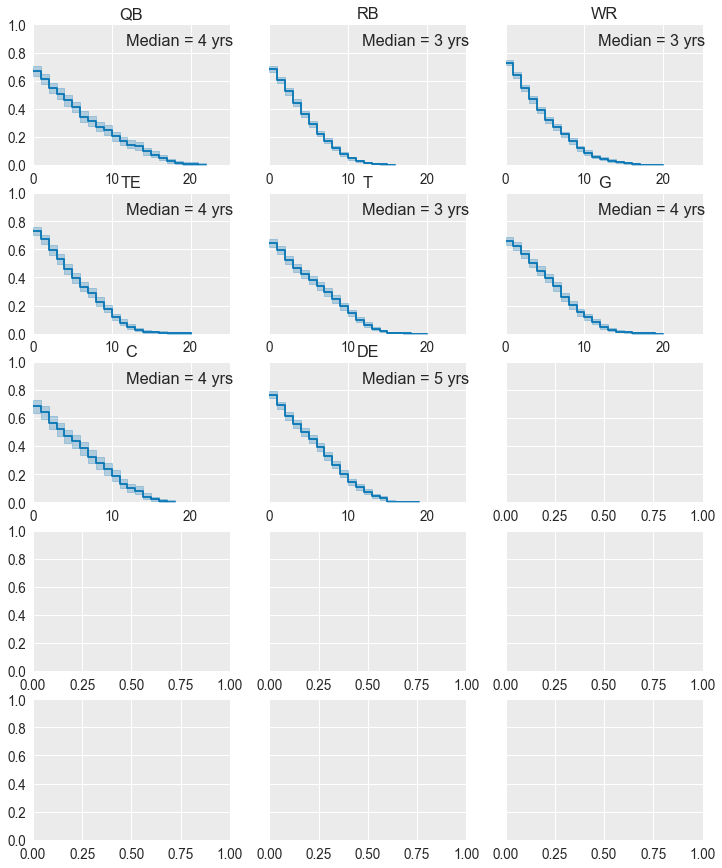

In [29]:
# create a new KMF object
kmf_by_pos = KaplanMeierFitter()

duration = draft_df_2.Duration
observed = draft_df_2.Retired

# Set the order that the positions will be plotted
positions = ["QB", "RB", "WR",
             "TE", "T", "G",
             "C", "DE", "DT"
             "NT", "LB", "DB",
             "FB", "K", "P"]

# Set up the 5x3 plotting grid by creating figure and axes objects
# Set sharey to True so that each row of plots share the left most y-axis labels
fig, axes = plt.subplots(nrows=5, ncols=3, sharey=True, figsize=(12, 15))

# flatten() creates a 1-D array of the individual axes (or subplots)
# that we will plot on in our grid
# We zip together the two 1-D arrays containing the positions and axes
# so we can iterate over each position and plot its KM estimate onto
# its respective axes
for pos, ax in zip(positions, axes.flatten()):
    # get indices for players with the matching position label
    idx = draft_df_2.Pos == pos
    
    # fit the kmf for those players
    kmf_by_pos.fit(duration[idx], observed[idx])
    
    # plot the KM estimate for that position on its respective axes
    kmf_by_pos.plot(ax=ax, legend=False)
    
    # place text indicating the median for the position
    # the xy-coord passed in represents the fractional value for each axis
    # for example (.5, .5) places text at the center of the plot
    ax.annotate("Median = {:.0f} yrs".format(kmf_by_pos.median_), xy = (.47, .85), xycoords = "axes fraction")
    
    # get rid the default "timeline" x-axis label set by kmf.plot()
    ax.set_xlabel("")
    
    # label each plot by its position
    ax.set_title(pos)
    
    # set a common x and y axis across all plots
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 1)
    
# tighten up the padding for the subplots
fig.tight_layout()

# https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots
# set a common x-axis label
fig.text(0.5, -0.01, "Timeline (Years)", ha="center")

# set a common y-axis label
fig.text(-0.01, 0.5, "Probability That a Player is Still Active", va="center", rotation="vertical")

# add the title for the whole plot
fig.suptitle("Survival Curve for each NFL Position\n(Players Drafted from 1967-2015)", fontsize=20)

# add some padding between the title and the rest of the plot to avoid overlap
fig.subplots_adjust(top=0.92)

plt.show()

# Checking the Conditional Survival Time

In [50]:
kmf._conditional_time_to_event_()

,KM_estimate - Conditional time remaining to event
timeline,
0.0,6.0
1.0,5.0
2.0,5.0
3.0,5.0
4.0,4.0
5.0,4.0
6.0,3.0
7.0,3.0
8.0,3.0
